## 2) Text Cleaning

In [17]:
import sys
print(sys.version)

3.5.2 |Continuum Analytics, Inc.| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]


In [18]:
# Use AzureML's data collector to log various metrics!
#from azureml.logging import current_scriptrun
#logger = current_scriptrun()

import string, re
import pandas as pd
from nltk.corpus import stopwords
from gensim import corpora, models, similarities
import azureml
from __future__ import division
import numpy as np
import nltk
from nltk.corpus import stopwords
from azure.storage.blob import BlockBlobService

# import libraries
from __future__ import print_function
import numpy as np
from six.moves import zip
import json
import warnings
import pandas as pd
from pandas import DataFrame   
import pickle
import re
import sys 
import azureml
import string
from scipy import stats
import pip
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer     
from keras.preprocessing import sequence
import os
import tempfile  
import logging
import gensim
from gensim.models import Phrases, phrases
from gensim.models.phrases import Phraser
from gensim.models import Word2Vec as wv
import nltk
from nltk.corpus import stopwords
from gensim import corpora, models, similarities
from IPython.display import SVG
import cloudpickle
import csv
import mkl
import matplotlib.pyplot as plt
import h5py
from keras.models import load_model
import re
import io
from os.path import dirname, join
import regex

Imprt source text and write to a pandas dataframe

In [19]:
import os
os.getcwd()

'C:\\Users\\pattyry\\Documents\\AzureML\\NextAgenda_CodeStory\\NextAgenda_CodeStory'

In [20]:
import pickle
with open('biotechsource.pkl', 'rb') as f:
    data = pickle.load(f)
    print("Data unpickled")
    import pandas as pd
biotechdata = pd.DataFrame(data)

print(biotechdata.shape)
biotechdata.head(2)


Data unpickled
(921, 4)


,count,fulltext,ReturnBin_4Weeks,ReturnBin_26Weeks
131,72955,BusinessOverview. ACAD. . Overview We are ...,0,0
133,74741,BusinessOverview. ACAD. . Company Overview...,2,2


In [21]:
import pickle
with open('allindustriessource.pkl', 'rb') as f:
    data = pickle.load(f)
    print("Data unpickled")
    import pandas as pd
allindustriesdata = pd.DataFrame(data)

print(allindustriesdata.shape)
allindustriesdata.head(2)

Data unpickled
(31002, 5)


,Category,count,fulltext,ReturnBin_4Weeks,ReturnBin_26Weeks
1,Major Airlines,87146,BusinessOverview. AAL. OverviewAmerican Ai...,0,1
2,Major Airlines,37564,BusinessOverview. AAL. Chapter 11 Proceedi...,2,2


Review data

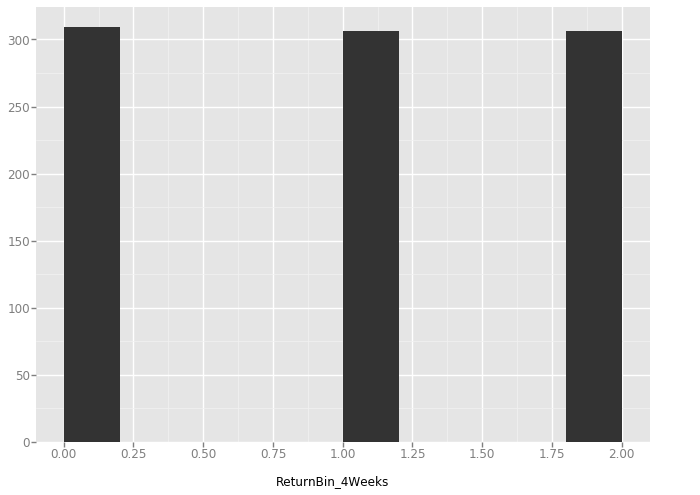

<ggplot: (136008569373)>

In [22]:
import ggplot
from ggplot import *
ggplot(biotechdata, aes(x='ReturnBin_4Weeks')) + \
    geom_histogram() 

In [23]:
biotechdata.head(3)
data = biotechdata

Discard data not of interest

In [24]:
data1=data.drop(['ReturnBin_26Weeks'], axis=1)
print(data1.shape)
print(data1.head(2))
#print(data1.dtypes)
thedata = data1
thedata['fulltext'] = thedata['fulltext'].str.encode('utf-8')
thedata['fulltext'] = thedata['fulltext'].str.lower()

(921, 3)
     count                                           fulltext ReturnBin_4Weeks
131  72955  BusinessOverview.   ACAD.   . Overview We are ...                0
133  74741  BusinessOverview.   ACAD.   . Company Overview...                2


Clean the text

In [25]:

##########################################
# clean up the text in the data with regex
##########################################


def clean_text(row):
    text = str(row['fulltext'])

    # Remove newline characters
    cleantext = text.replace('\r\n', ' ')

    # Convert HTML punctuation chaaracters
    cleantext = cleantext.replace(' www.', ' ')   
    cleantext = cleantext.replace('.com ', ' ')    
    cleantext = cleantext.replace('.', ' ')
    cleantext = cleantext.replace(',', ' ')
    cleantext = cleantext.replace('!', ' ')
    cleantext = cleantext.replace('$;', ' ')
    cleantext = cleantext.replace(';', ' ')
    cleantext = cleantext.replace(')', ' ')
    cleantext = cleantext.replace('(', ' ')   
    cleantext = cleantext.replace('>', ' ')  
    cleantext = cleantext.replace('<', ' ')  
    cleantext = cleantext.replace('-', ' ')  #take away hyphen and collapse hyphenated words
    cleantext = cleantext.replace(' the ', ' ')  
    cleantext = cleantext.replace(' of ', ' ')   
    cleantext = cleantext.replace(' in ', ' ')  
    cleantext = cleantext.replace(' and ', ' ')  
    cleantext = cleantext.replace(' by ', ' ')  
    cleantext = cleantext.replace(' to ', ' ')  
    cleantext = cleantext.replace(' at ', ' ')  
    cleantext = cleantext.replace(' on ', ' ') 
    cleantext = cleantext.replace(' for ', ' ')  
#    cleantext = cleantext.replace(' be ', ' ')   
    cleantext = cleantext.replace(' is ', ' ')    
    cleantext = cleantext.replace(' or ', ' ')   
#    cleantext = cleantext.replace(' we ', ' ')   
#    cleantext = cleantext.replace(' that ', ' ')   
#    cleantext = cleantext.replace(' our ', ' ')   
    cleantext = cleantext.replace(' as ', ' ')        
    cleantext = cleantext.replace(' from ', ' ')   
#    cleantext = cleantext.replace(' are ', ' ')   
    cleantext = cleantext.replace(' with ', ' ')   
#    cleantext = cleantext.replace(' us ', ' ')   
#    cleantext = cleantext.replace(' was ', ' ')        
    cleantext = cleantext.replace(' this ', ' ')   
    cleantext = cleantext.replace(' an ', ' ')        
    cleantext = cleantext.replace(' by ', ' ')   
    cleantext = cleantext.replace(' sr ', ' ')      
    cleantext = cleantext.replace(' it ', ' ')  
    cleantext = cleantext.replace(' s ', ' ')   


    #remove non alpha characters and specific noise
    cleantext = re.sub(r'\d+', ' ',cleantext)
    cleantext = re.sub(r'^b',' ',cleantext)
    cleantext = re.sub(r'[^\w]',' ',cleantext)
    cleantext = cleantext.replace('xc xs', ' ')  
    cleantext = cleantext.replace('xe xs', ' ')  
    cleantext = cleantext.replace('xc xS', ' ')  
    cleantext = cleantext.replace('xe xS', ' ')  
    cleantext = cleantext.replace('xc xa', ' ')  
    cleantext = cleantext.replace('xe xa', ' ')  
    cleantext = cleantext.replace(' xc xc x', ' ')  
    cleantext = cleantext.replace(' xc ', ' ')  
    cleantext = cleantext.replace(' xe ', ' ')  
    cleantext = cleantext.replace(' xs ', ' ')  
    cleantext = cleantext.replace(' xa ', ' ')  
    cleantext = cleantext.replace(' ct ', ' ')  
    cleantext = cleantext.replace(' x ', ' ')  
    cleantext = cleantext.replace(' non exclusive ', ' non-exclusive ') 
    cleantext = cleantext.replace(' u ', ' ')   
    cleantext = cleantext.replace(' s ', ' ')  
    
    #remove specific noise
    cleantext = cleantext.translate(str.maketrans({'‘':' ','’':' '}))
    cleantext = cleantext.translate(str.maketrans({',':' ',',':' '}))
    cleantext = cleantext.translate(str.maketrans({'[':' ',']':' '}))
    cleantext = cleantext.translate(str.maketrans({'"':' ','%':' '}))
    cleantext = cleantext.translate(str.maketrans({'^':' ','*':' '}))

    #remove punctuation
    punctpattern = re.compile('[%s]' % re.escape(string.punctuation))
    cleanttext = re.sub(punctpattern,'', cleantext)

    #remove single letter word
    cleantext = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', cleantext) 

    # Remove extra spaces
    cleantext = re.sub('\s+', ' ', cleantext).strip()

    return cleantext



In [26]:
#apply text fixes to the input text column
thedata['CleanText'] = thedata.apply(clean_text, axis=1)
justcleandocs=thedata.drop(['fulltext'], axis=1)


justcleandocs.rename(columns={'ReturnBin_4Weeks':'Return3Bin_4Weeks'}, inplace=True)
justcleandocs.rename(columns={'CleanText':'fulltext'}, inplace=True)
justcleandocs.head(8)




,count,Return3Bin_4Weeks,fulltext
131,72955,0,businessoverview acad overview we are biopharm...
133,74741,2,businessoverview acad company overview we are ...
134,77027,0,businessoverview acad company overview we are ...
135,88700,0,businessoverview acad company overview we are ...
136,73165,2,businessoverview acad overview we are biopharm...
137,72584,2,businessoverview acad overview we are biopharm...
138,68811,0,businessoverview acad overview we are biopharm...
139,69615,2,businessoverview acad overview we are biopharm...


In [27]:

justcleandocs.head(2)
justcleandocs.shape


(921, 3)

In [28]:
with open('biotechcleaned.pkl', 'wb') as f:
    pickle.dump(justcleandocs, f)
#df = pd.read_pickle(file_name)

In [29]:
#save a cleaned copy to inspect
justcleandocs.to_csv('cleandata.tsv', sep='\t', encoding='utf-8')
justcleandocs.to_csv('cleandatacomma.tsv', sep=',', encoding='utf-8',header=True)

In [30]:
documents = justcleandocs['fulltext'].values

In [31]:
len(documents)

921

In [32]:
documents[6]

'businessoverview acad overview we are biopharmaceutical company focused development commercialization small molecule drugs treatment central nervous system disorders our pipeline consists four product candidates including pimavanserin which phase iii development treatment parkinson disease psychosis we hold worldwide commercialization rights pimavanserin addition we have product candidate phase ii development chronic pain product candidate phase development glaucoma both collaboration allergan inc well program ind track development collaboration meiji seika kaisha ltd all product candidates our pipeline emanate discoveries made using our proprietary drug discovery platform product candidates our pipeline address diseases that are not well served currently available therapies that represent large potential commercial opportunities we believe our product candidates offer innovative therapeutic approaches may provide significant advantages relative current therapies our most advanced pro